# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data

In [2]:
# Read the raw file content
file_path = 'housing.csv'
with open(file_path, 'r') as file:
    raw_data = file.read()

# Split the raw data by lines
lines = raw_data.splitlines()

# Split each line by whitespace to get the columns
data_list = [line.split() for line in lines]

# Convert the list of lists into a DataFrame
data = pd.DataFrame(data_list[:], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# Display the cleaned data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [3]:
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
444,12.80230,0.00,18.100,0,0.7400,5.8540,96.60,1.8956,24,666.0,20.20,240.52,23.79,10.80
79,0.08387,0.00,12.830,0,0.4370,5.8740,36.60,4.5026,5,398.0,18.70,396.06,9.10,20.30
432,6.44405,0.00,18.100,0,0.5840,6.4250,74.80,2.2004,24,666.0,20.20,97.95,12.03,16.10
478,10.23300,0.00,18.100,0,0.6140,6.1850,96.70,2.1705,24,666.0,20.20,379.70,18.03,14.60
275,0.09604,40.00,6.410,0,0.4470,6.8540,42.80,4.2673,4,254.0,17.60,396.90,2.98,32.00


## Cheacking for null values

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


## Inspect the data

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
unique,504,26,76,2,81,446,356,412,9,66,46,357,455,229
top,0.01501,0.00,18.100,0,0.5380,5.7130,100.00,3.4952,24,666.0,20.20,396.90,7.79,50.00
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


## Changing the data type

In [7]:
data = data.astype(float)

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Profiling Report")

In [11]:
# profile

In [12]:
data['CHAS'] = data['CHAS'].astype(object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


## Checking for outliers

<Axes: >

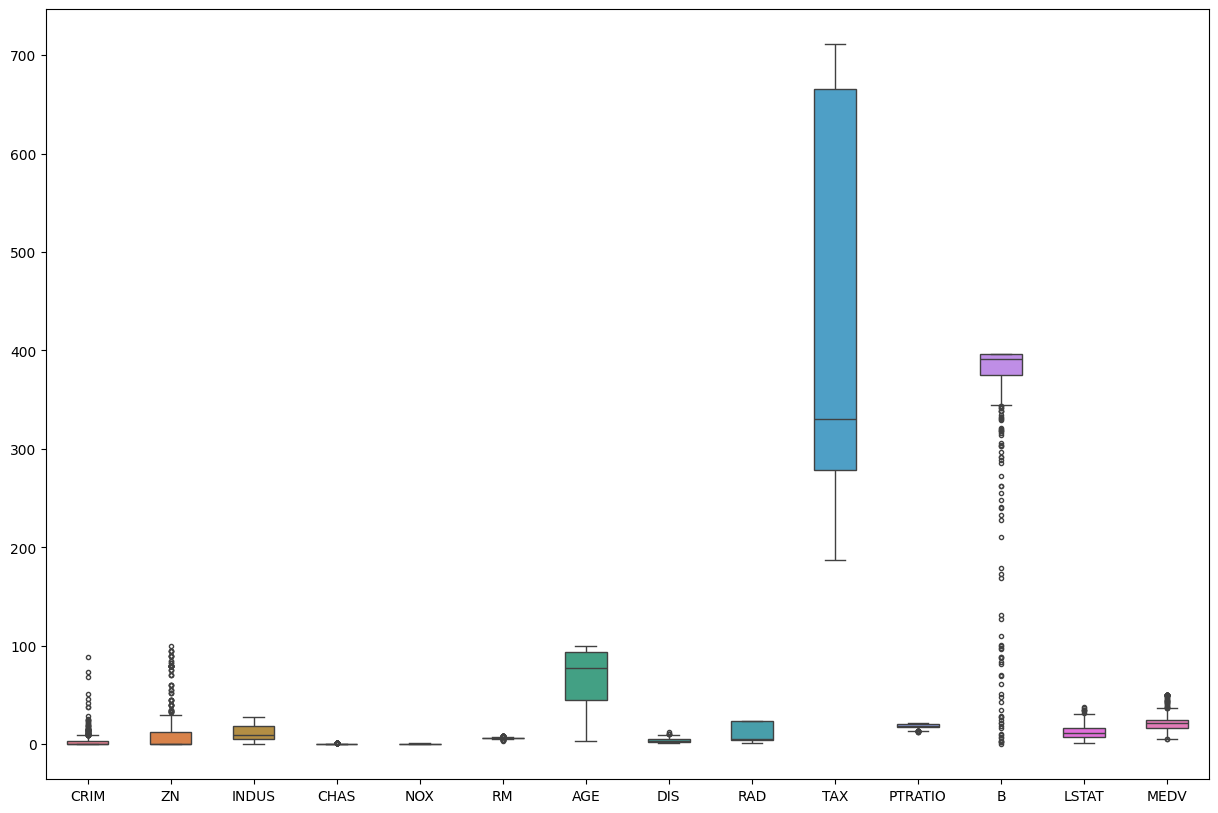

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

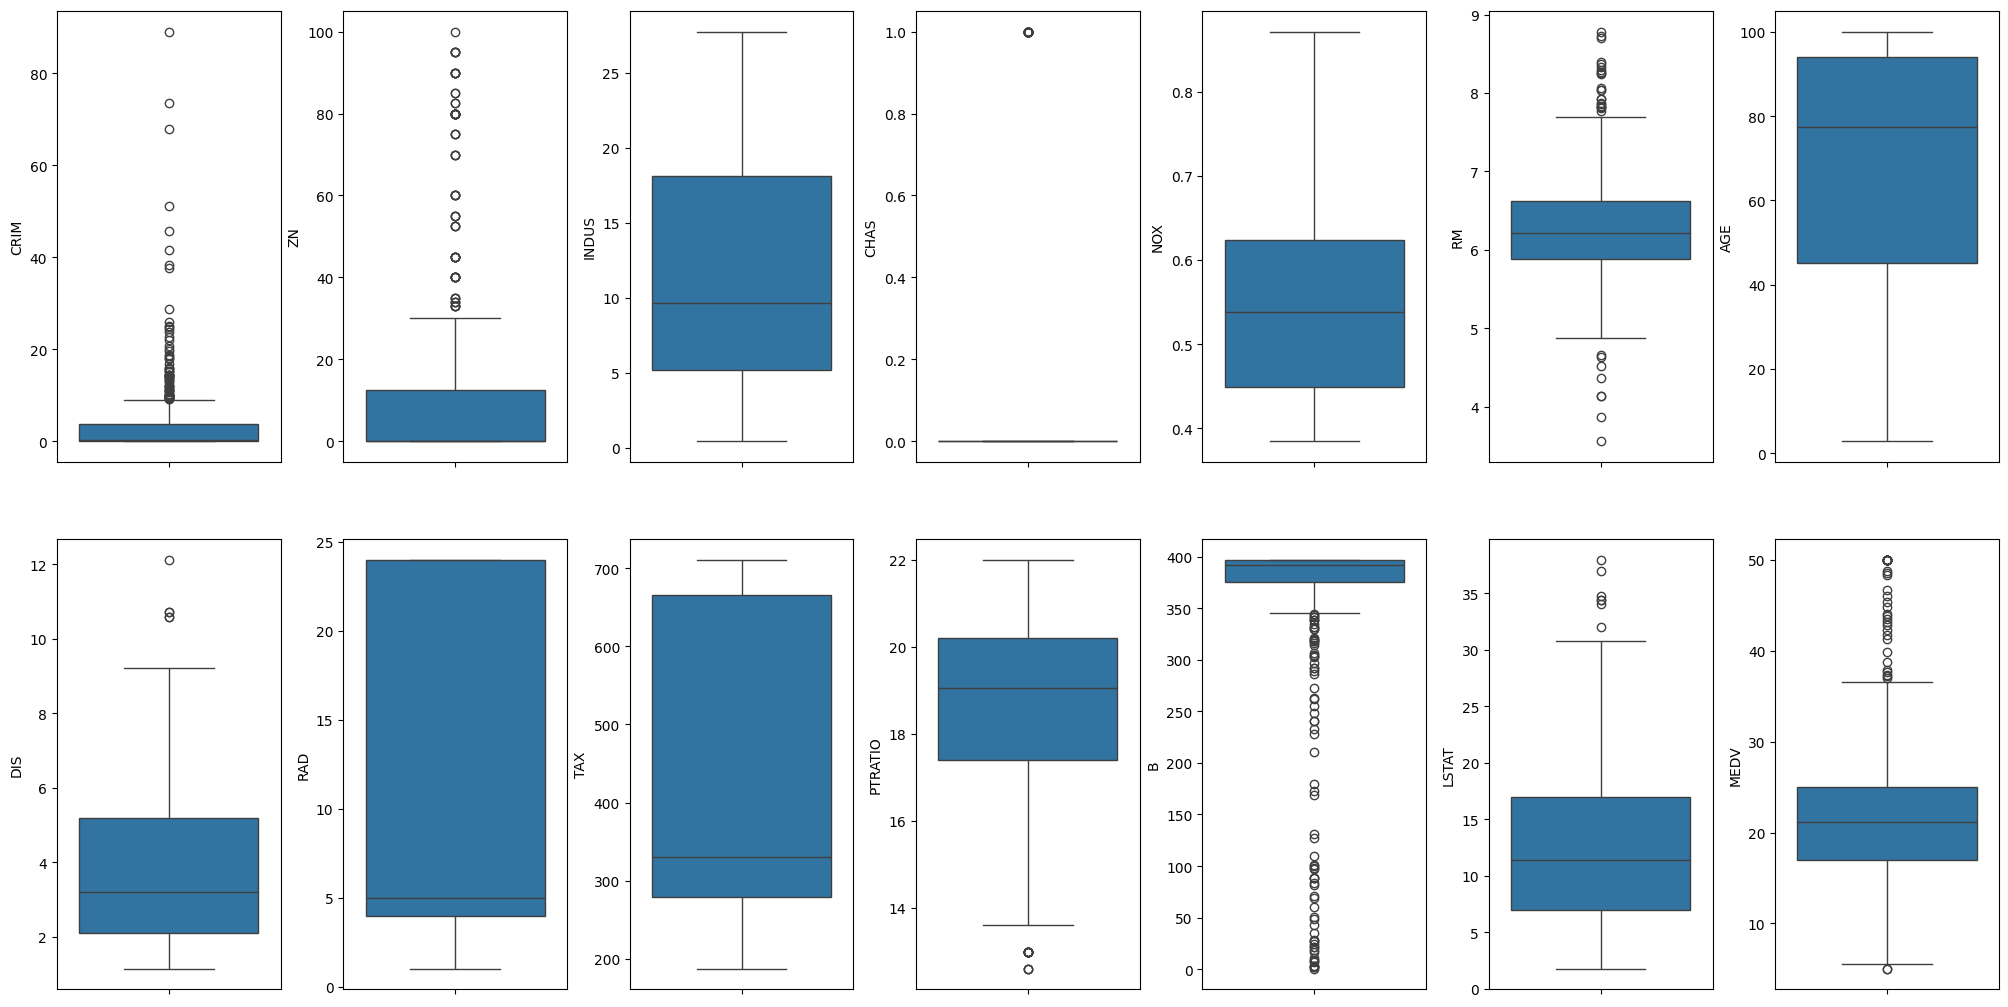

In [15]:
from scipy import stats
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
# SO we can see columns CRIM, ZN, RM, B and LSTAT contains outliers

## Handling the outliers

In [20]:
col_up = ['CRIM', 'ZN', 'RM', 'B', 'LSTAT']
for cols in col_up:
    
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3-q1
    
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    
    data[cols] = np.where(
        data[cols] > upper_limit,
        upper_limit,
        np.where(
            data[cols] < lower_limit,
            lower_limit,
            data[cols]
        )
    )

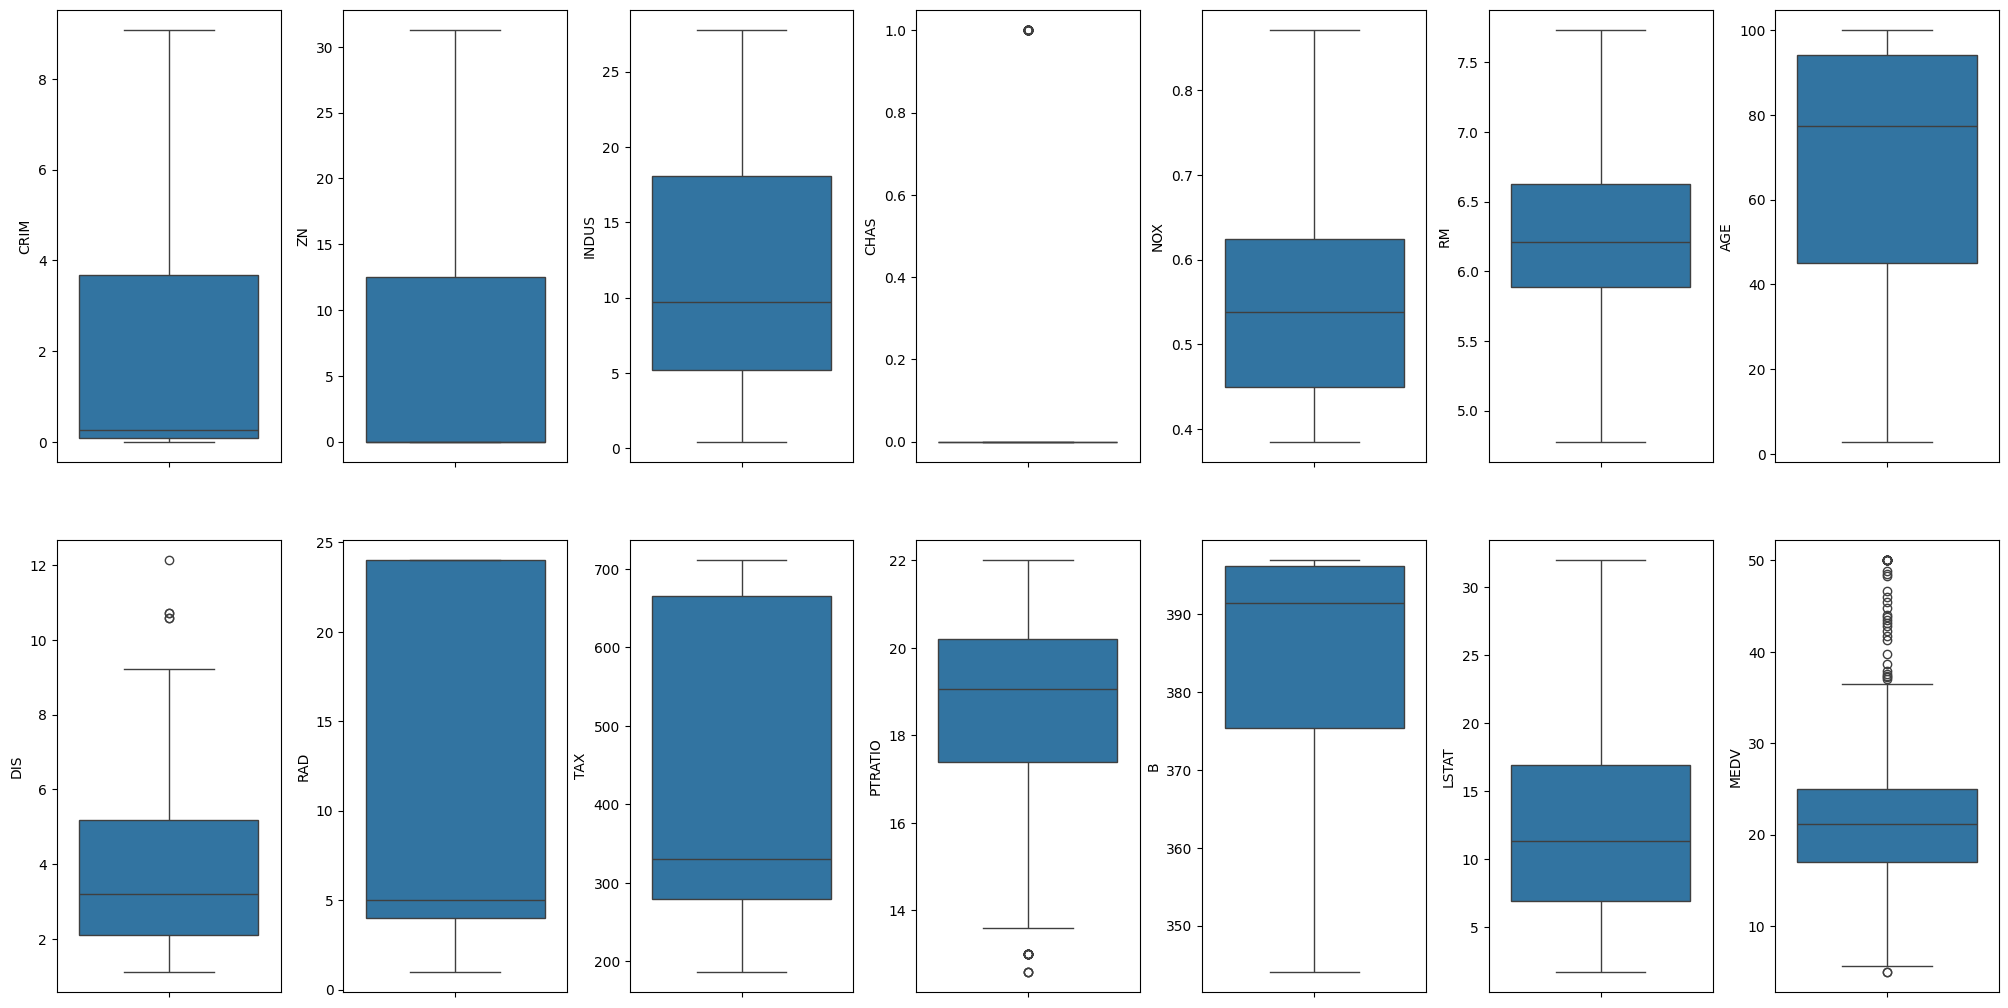

In [21]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [22]:
# Checking the number of outliers in DIS column
q1 = data['DIS'].quantile(0.25)
q3 = data['DIS'].quantile(0.75)
iqr = q3-q1
up = q3 + 1.5*iqr
lo = q1 - 1.5*iqr
outliers = ((data['DIS'] < lo) | (data['DIS'] > up)).sum()
print(outliers)

5


In [23]:
# Dropping the outliers of DIS column
data = data[data['DIS'] < up]

In [24]:
data.shape

(501, 14)

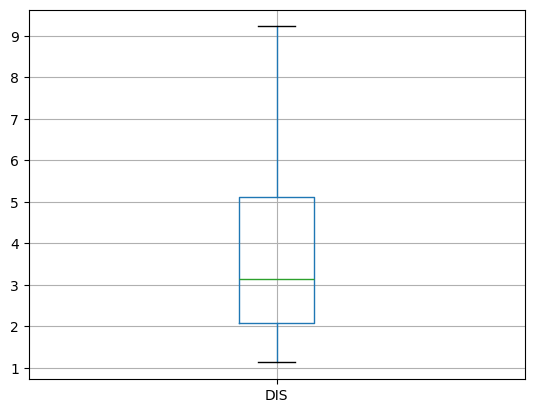

In [25]:
figure=data.boxplot(column="DIS")

C:\Users\ankit\AppData\Local\Temp\ipykernel_18532\2351854020.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ankit\AppData\Local\Temp\ipykernel_18532\2351854020.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ankit\AppData\Local\Temp\ipykerne

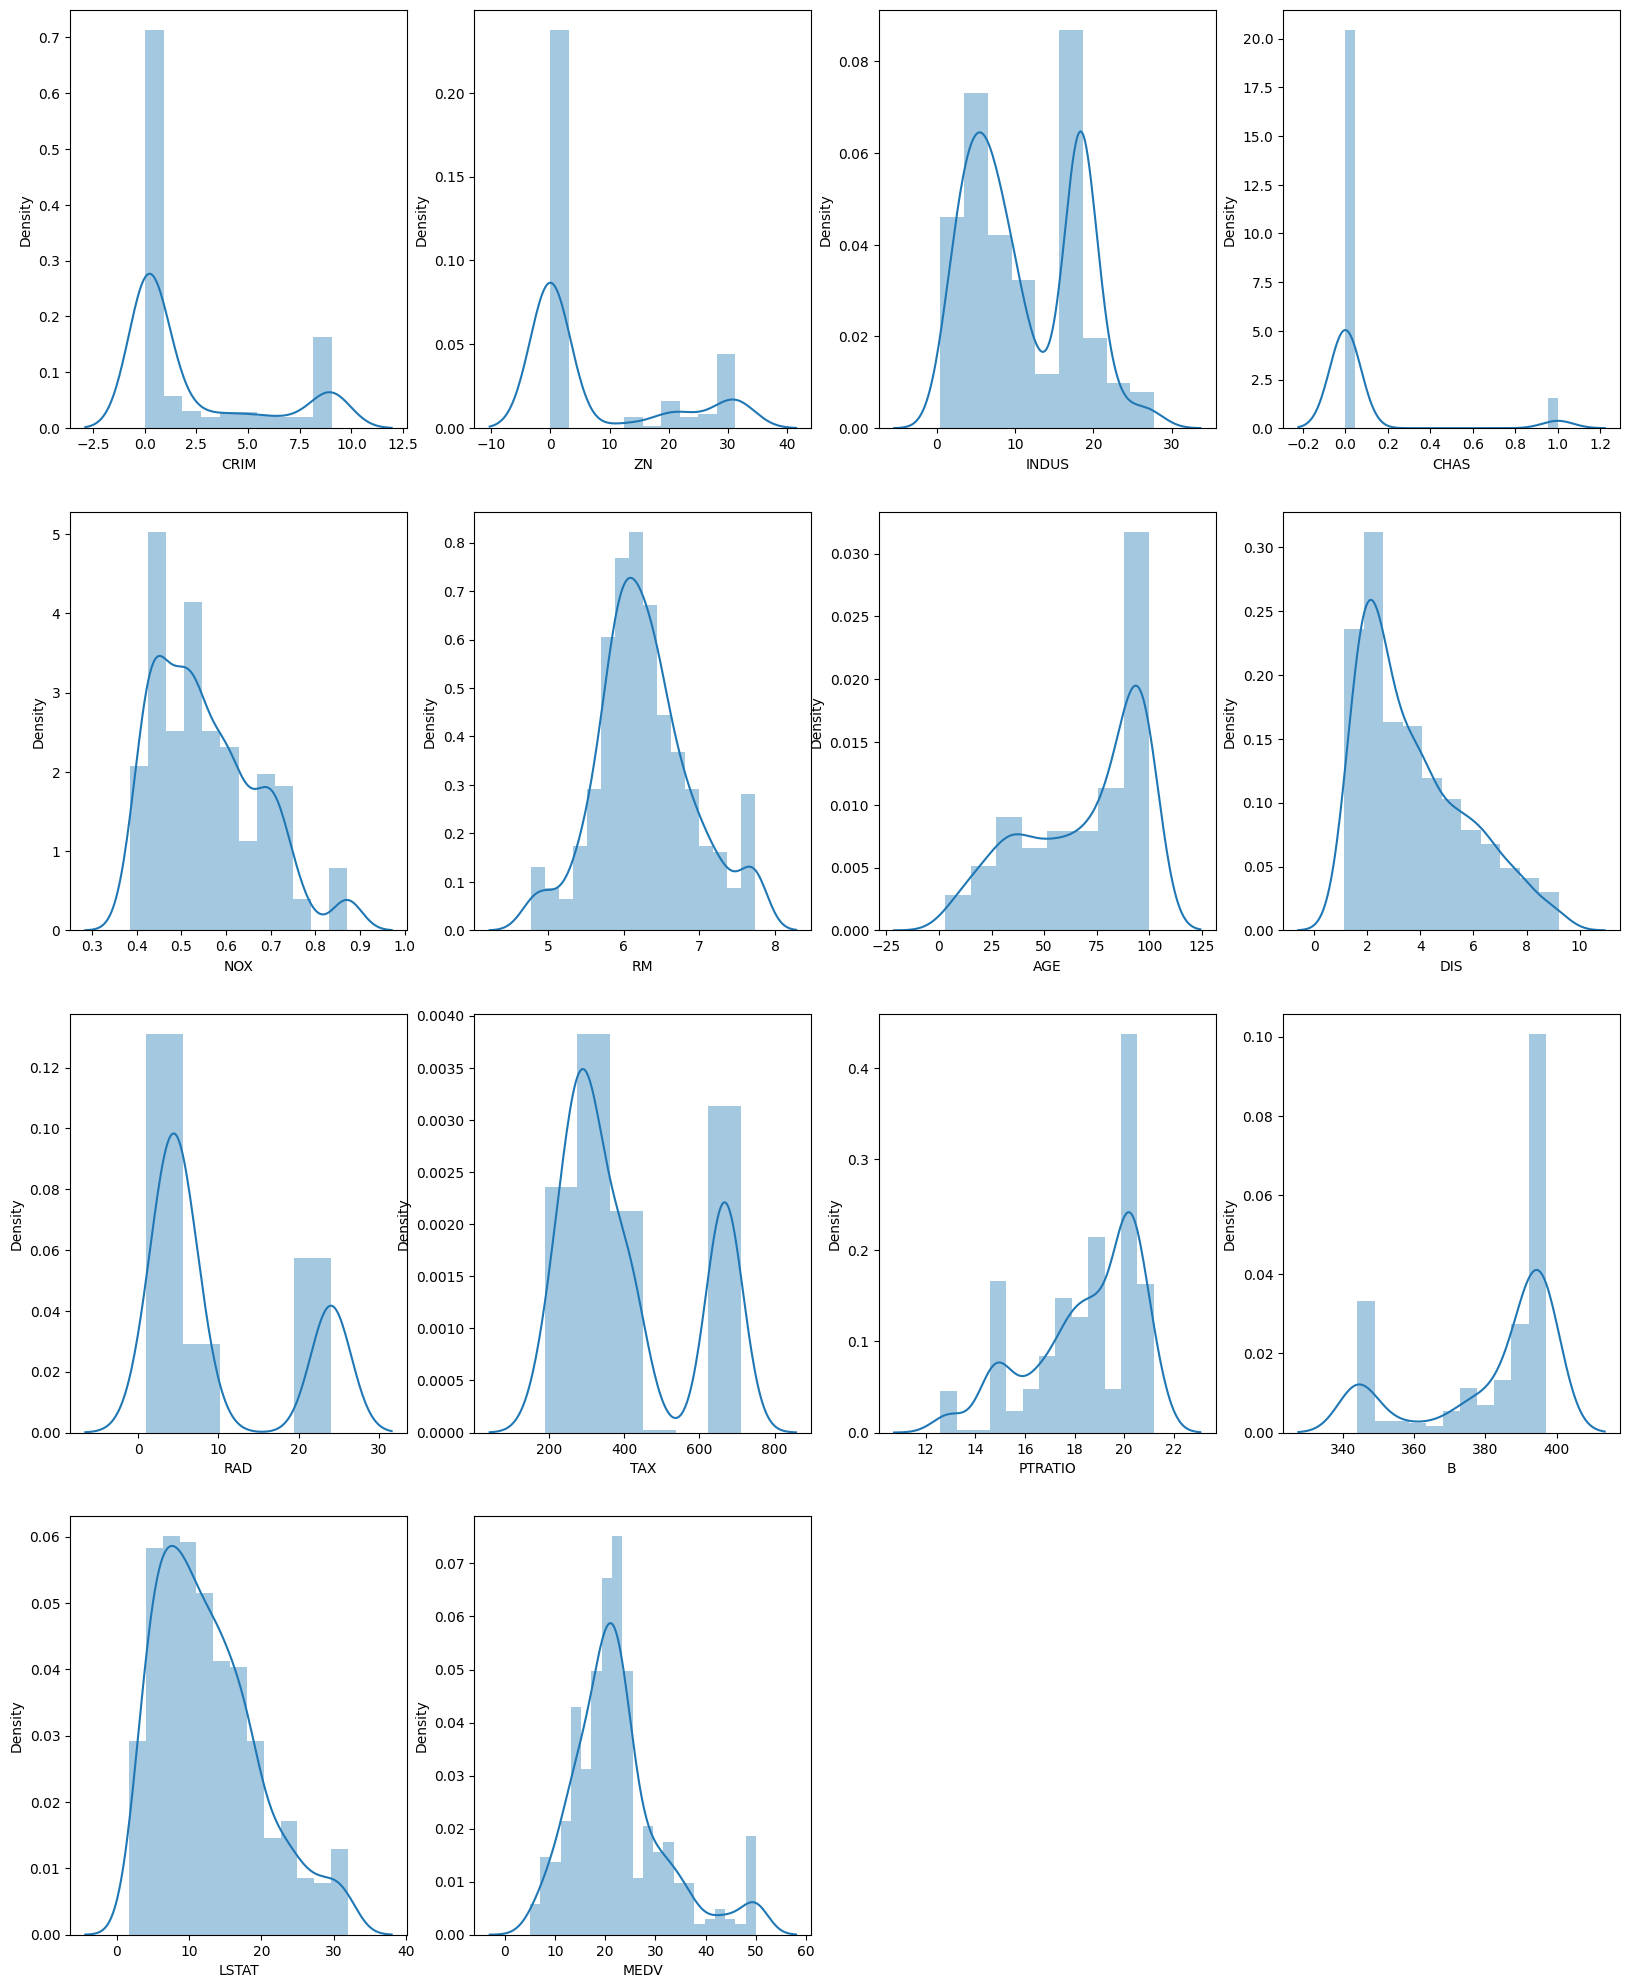

In [26]:
# Analyzing the spread of data in each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

## Checking for constant columns

In [28]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [29]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [30]:
# Hence none of the columns is constant

# Checking Correlation

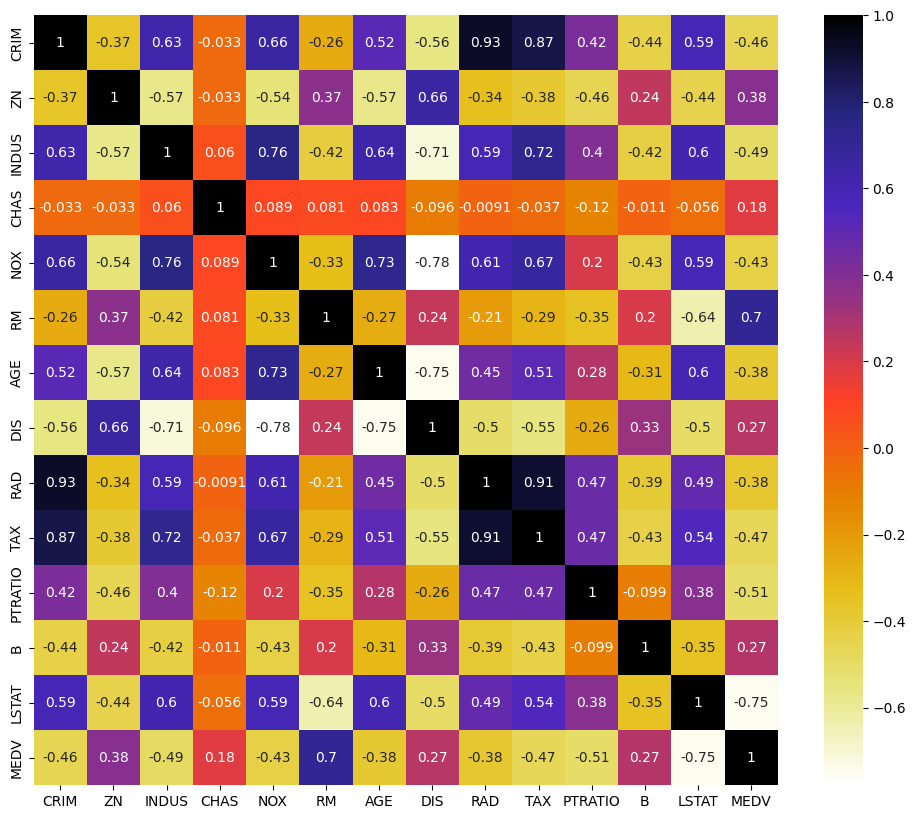

In [31]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
# Checking for correlated columns
corr_features = correlation(data, 0.8)
len(set(corr_features))

2

In [34]:
corr_features

{'RAD', 'TAX'}

In [35]:
# dropping RAD and TAX

In [36]:
data = data.drop(columns=['RAD','TAX'])

In [37]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


## Checking Skewness in Data

In [38]:
for column in data:
    perc = data[column].skew()
    print("Column %s skewness = %.2f%%" % (column, perc))

Column CRIM skewness = 1.27%
Column ZN skewness = 1.31%
Column INDUS skewness = 0.29%
Column CHAS skewness = 3.38%
Column NOX skewness = 0.72%
Column RM skewness = 0.29%
Column AGE skewness = -0.62%
Column DIS skewness = 0.84%
Column PTRATIO skewness = -0.81%
Column B skewness = -1.16%
Column LSTAT skewness = 0.80%
Column MEDV skewness = 1.11%


In [39]:
# Applying Log Transform on +ve skewed Data
col_log = ['CRIM', 'ZN', 'RM', 'DIS','MEDV','LSTAT','NOX']
data[col_log] = data[col_log].apply(lambda x: np.log1p(x))

In [40]:
for column in data:
    perc = data[column].skew()
    print("Column %s skewness = %.2f%%" % (column, perc))

Column CRIM skewness = 0.90%
Column ZN skewness = 1.14%
Column INDUS skewness = 0.29%
Column CHAS skewness = 3.38%
Column NOX skewness = 0.58%
Column RM skewness = 0.01%
Column AGE skewness = -0.62%
Column DIS skewness = 0.28%
Column PTRATIO skewness = -0.81%
Column B skewness = -1.16%
Column LSTAT skewness = -0.23%
Column MEDV skewness = -0.24%


In [41]:
# Sq Transformation on Left Skewed Data
colSq = ['AGE','PTRATIO','B']
data[colSq] = data[colSq].apply(lambda x: x**2)

In [42]:
for column in data:
    perc = data[column].skew()
    print("Column %s skewness = %.2f%%" % (column, perc))

Column CRIM skewness = 0.90%
Column ZN skewness = 1.14%
Column INDUS skewness = 0.29%
Column CHAS skewness = 3.38%
Column NOX skewness = 0.58%
Column RM skewness = 0.01%
Column AGE skewness = -0.20%
Column DIS skewness = 0.28%
Column PTRATIO skewness = -0.63%
Column B skewness = -1.13%
Column LSTAT skewness = -0.23%
Column MEDV skewness = -0.24%


In [43]:
x = data.drop('MEDV', axis=1)
y = data['MEDV']

## Applying Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0)

## Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [46]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [48]:
y_pred = reg.predict(x_test_scaled)

## Importing Evaluation Metrics

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [50]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-Squared: {r2}')

Mean Squared Error: 0.053087409356279
Mean Absolute Error: 0.15529517347845562
R-Squared: 0.6387496532865728


## SVR

In [71]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_scaled,y_train)

y_pred = svr.predict(x_test_scaled)
r2_score(y_test,y_pred)

0.7336240663199711

## XgBoost

In [76]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(x_train_scaled,y_train)

y_pred = xgr.predict(x_test_scaled)
r_squared = r2_score(y_test,y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.7368144110414707

## Random Forest 

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

y_pred = rf.predict(x_test_scaled)
r_squared = r2_score(y_test,y_pred)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.7577389019502718

In [55]:
# Since RandomForest is giving best performance so we will do hyper parameter tuning for RandomForest

## Hyperparameter Tuning

In [56]:
# grid_param = {
#     "n_estimators" : [90,100,150],
#     'criterion': ['squared_error', 'absolute_error'],
#     'max_depth' : range(7,15,1),
#     'min_samples_split' : range(2,20,2)
# }

In [57]:
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=grid_param, cv=10, n_jobs =-1)
# grid_search.fit(x_train_scaled,y_train)

In [58]:
# grid_search.best_params_

In [75]:
rf_gp = RandomForestRegressor(criterion='absolute_error', n_estimators=100, max_depth=11, min_samples_split=2)
rf_gp.fit(x_train_scaled,y_train)

y_pred = rf_gp.predict(x_test_scaled)
r_squared = r2_score(y_test,y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.7352681928253357

In [ ]:
# So it decreases our performance

## Checking for important features

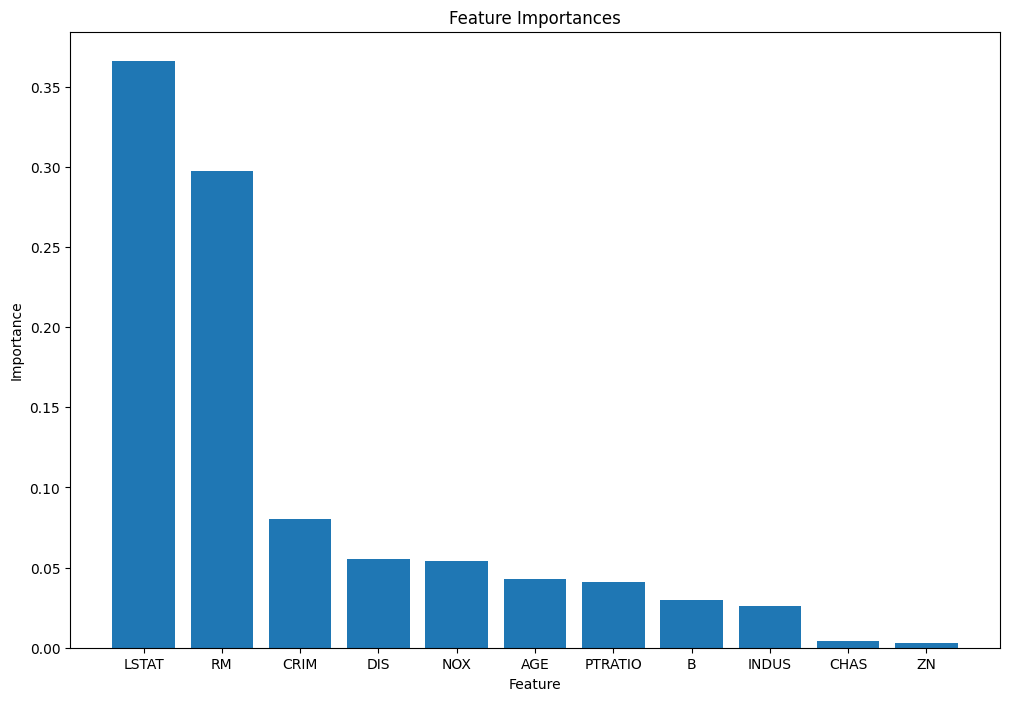

In [67]:
# Important features according to Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [68]:
x_train_drop = x_train_scaled.drop(columns=['INDUS','CHAS','ZN'])
x_test_drop = x_test_scaled.drop(columns=['INDUS','CHAS','ZN'])

### Re-training Random Forest

In [72]:
# Applying Random Forest
rf_drop = RandomForestRegressor()
rf_drop.fit(x_train_drop,y_train)

y_pred_drop = rf_drop.predict(x_test_drop)
r_squared = r2_score(y_test,y_pred_drop)
n = x_test_drop.shape[0]  # Number of samples
p = x_test_drop.shape[1]  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.7704506230010693

## Visualizing the model's performance

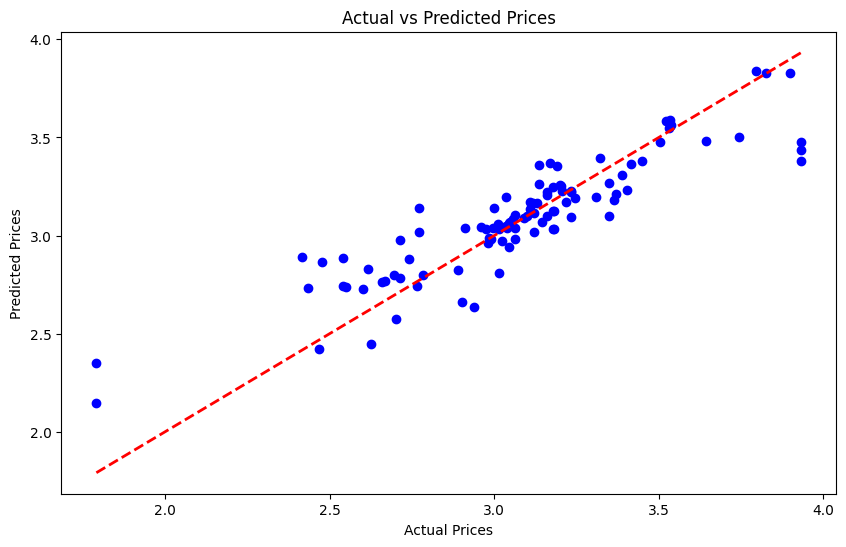

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_drop, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()